    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)   Support price      Profit  
0                       9.83           6000   7023.7735  
1                       

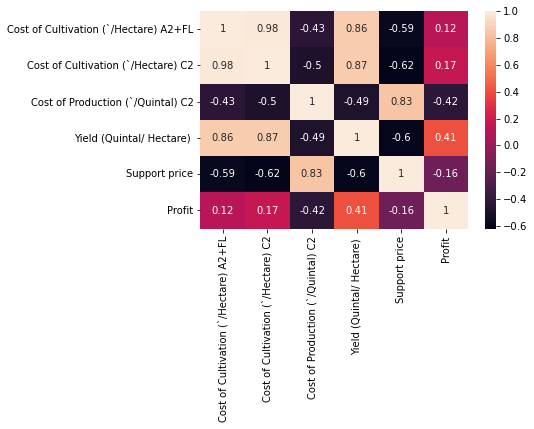

C:\Users\ATHARVA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


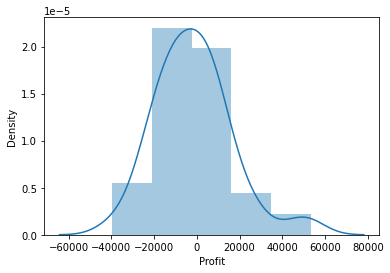

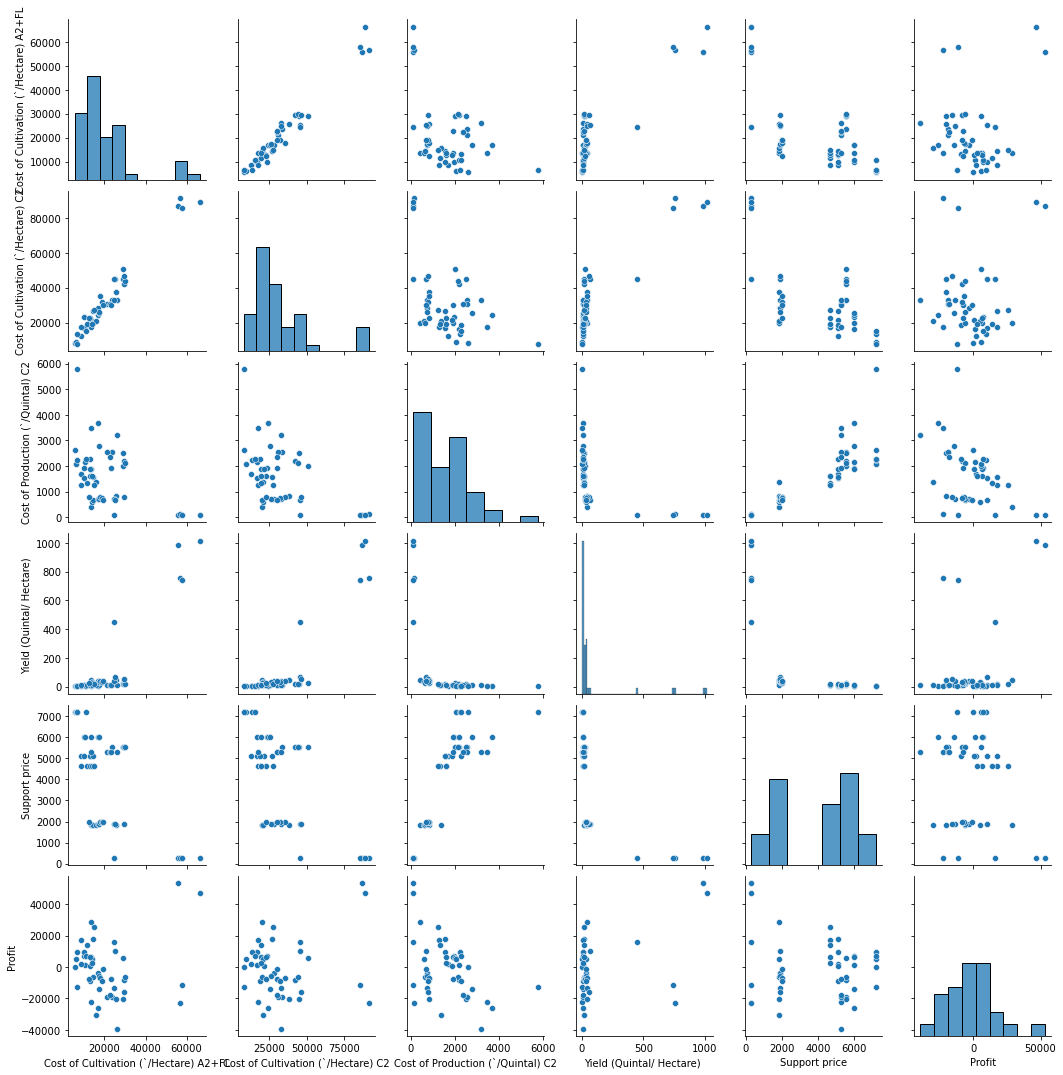

R2 score = 0.2
precision: [1.  0.7]
recall: [0.625 1.   ]
fscore: [0.76923077 0.82352941]
support: [8 7]


C:\Users\ATHARVA\AppData\Local\Temp\ipykernel_1352\3480747762.py:48: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x2 = np.array(columnTransformer.fit_transform(X), dtype = np.float)
C:\Users\ATHARVA\AppData\Local\Temp\ipykernel_1352\3480747762.py:51: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x3 = np.array(columnTransformer.fit_transf

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import utils

data = pd.read_csv('datafile.csv')
print(data.head())

data.isnull().sum()

data.info()

c= data.corr()
c

sns.heatmap(data.corr(), annot=True)
plt.show()


sns.distplot(data['Profit'],bins=5, kde=True)
plt.show()

sns.pairplot(data)
plt.show()

#model_development
#splitting_dataset_in_dependent_and_independent_variables

x=data.iloc[:,:-1].values
y=data.iloc[:,3].values

from sklearn.preprocessing import LabelEncoder 
labelencoder_X = preprocessing.LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:, 0])
X[:,1] = labelencoder_X.fit_transform(X[:, 1])


#One hot encoder 
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder='passthrough')   
x2 = np.array(columnTransformer.fit_transform(X), dtype = np.float) 

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[10])], remainder='passthrough')  
x3 = np.array(columnTransformer.fit_transform(x2), dtype = np.float) 

#output col in y 
y = Profit

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x3 = sc.fit_transform(x3)
#Splitting
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=3)



#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))


from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

##########################################
#Logitic
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
matrixForLR = confusion_matrix(y_test, y_pred)